In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings

sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [2]:
''' reading dataset '''
df = pd.read_csv('/content/disney_movies_total_gross.csv')

In [3]:
''' displaying first 5 rows of data '''
df.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [4]:
''' shape of data '''
df.shape

(579, 6)

In [5]:
''' checking null valeus '''
df.isnull().sum()

movie_title                  0
release_date                 0
genre                       17
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [6]:
''' info of data '''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


In [7]:
''' converting release_date into datetime '''
df.release_date = pd.to_datetime(df['release_date'])

In [8]:
''' transposing data '''
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_gross,579.0,6.470179e+07,9.301301e+07,0.0,12788864.0,30702446.0,75709033.0,9.366622e+08
inflation_adjusted_gross,579.0,1.187625e+08,2.860853e+08,0.0,22741232.0,55159783.0,119202000.0,5.228953e+09


In [9]:
df.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [10]:
''' best and worst total_gross '''
print("Best gross: ", max(df['total_gross']))
print("Worst gross: ", min(df.total_gross))

Best gross:  936662225
Worst gross:  0


In [11]:
''' retrieving data from release_date'''
df['year'] = df['release_date'].dt.date.astype(str).str.split('-', expand=True)[0]

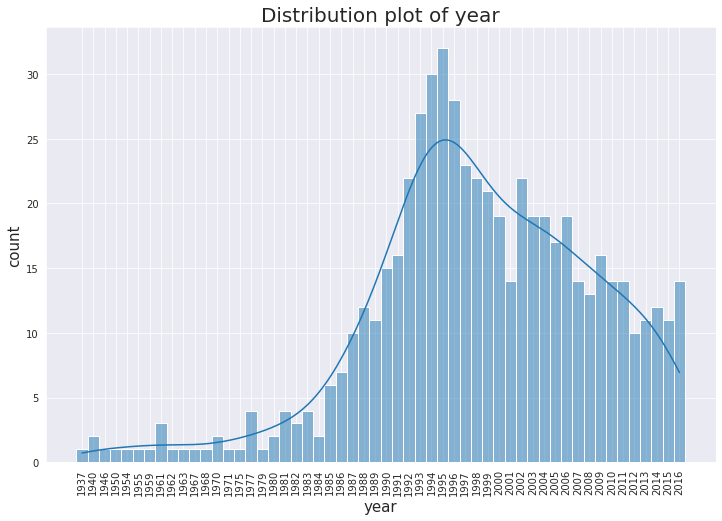

In [12]:
''' distribution plot of year '''
plt.figure(figsize=(12, 8))
plt.xticks(rotation=90)
plt.title('Distribution plot of year', fontsize=20)
sns.histplot(df['year'], kde=True);
plt.xlabel('year', fontsize=15)
plt.ylabel('count', fontsize=15);

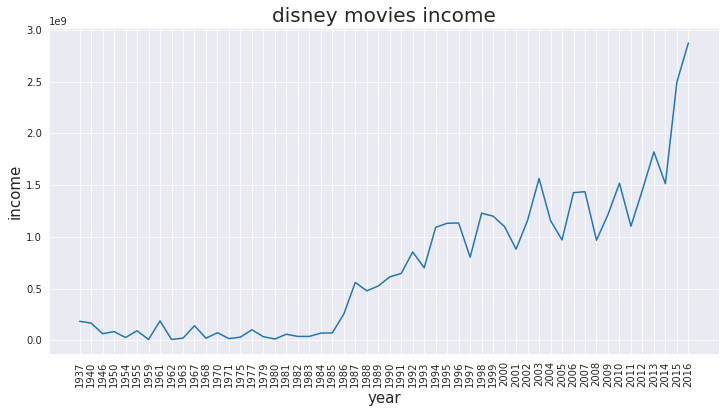

In [13]:
'''Have disney movies income decreased?'''
year_label = df.groupby('year').sum()

''' line plot '''
plt.figure(figsize=(12, 6))
plt.title('disney movies income', fontsize=20);
plt.xlabel('year', fontsize=15);
plt.ylabel('income', fontsize=15)
plt.xticks(rotation=90)
sns.lineplot(year_label.index, year_label['total_gross']);

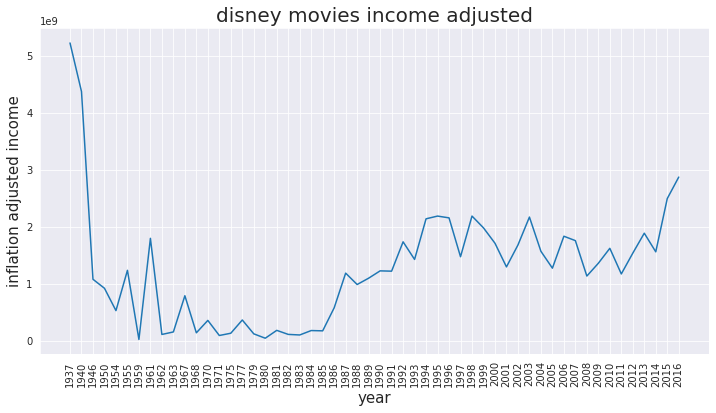

In [14]:
plt.figure(figsize=(12, 6))
plt.title('disney movies income adjusted', fontsize=20)
plt.xlabel('year', fontsize=15)
plt.ylabel('inflation adjusted income', fontsize=15)
plt.xticks(rotation=90)
sns.lineplot(year_label.index, year_label['inflation_adjusted_gross']);

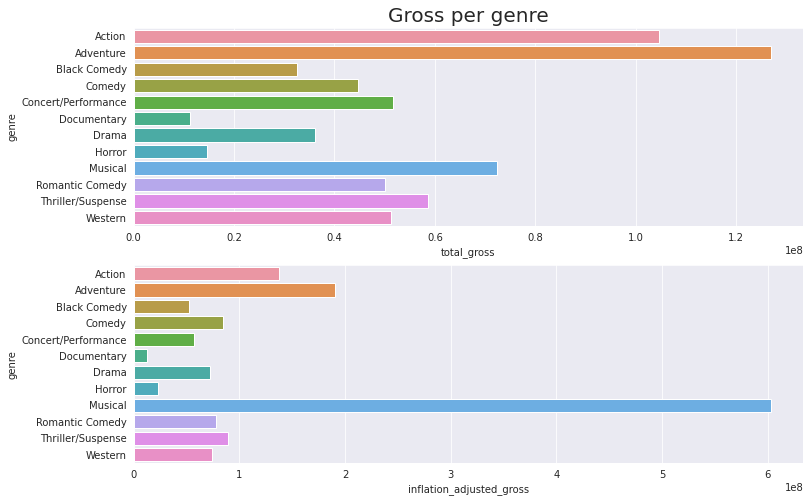

In [15]:
''' analyzing movies genres '''
average_g = df.groupby('genre').mean()

''' barplot '''
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1).set_title('Gross per genre', fontsize=20)
sns.barplot(average_g['total_gross'], average_g.index)
plt.subplot(2, 1, 2)

sns.barplot(average_g['inflation_adjusted_gross'], average_g.index);

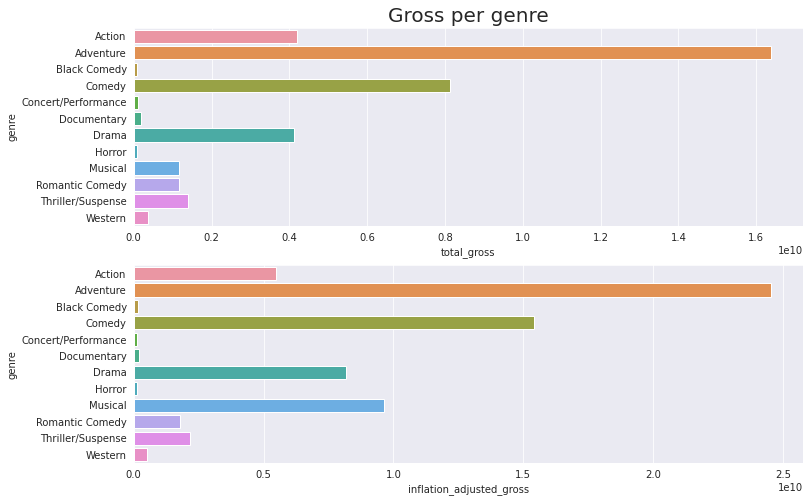

In [16]:
''' groupby genre '''
s_g = df.groupby('genre').sum()

''' barplot '''
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1).set_title('Gross per genre', fontsize=20)
sns.barplot(s_g['total_gross'], s_g.index)

plt.subplot(2, 1, 2)
sns.barplot(s_g['inflation_adjusted_gross'], s_g.index);

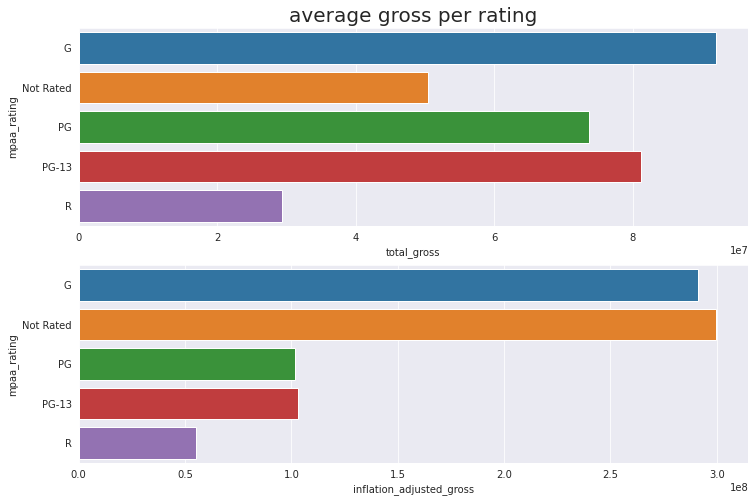

In [17]:
''' grouby mpaa_rating '''
average_r = df.groupby('mpaa_rating').mean()

''' barplot '''
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1).set_title('average gross per rating', fontsize=20)
sns.barplot(average_r['total_gross'], average_r.index)

plt.subplot(2, 1, 2)
sns.barplot(average_r['inflation_adjusted_gross'], average_r.index);

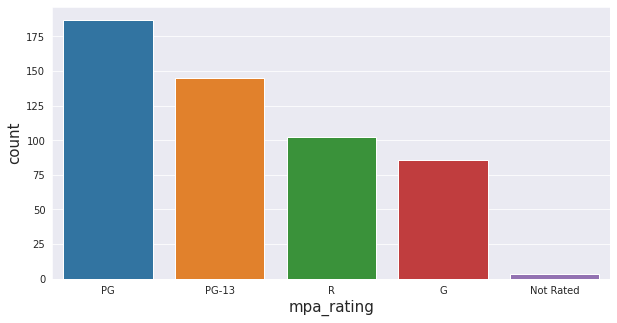

In [18]:
''' value_counts of mpaa rating '''
mpa_label = df.mpaa_rating.value_counts()

''' barplot '''
plt.figure(figsize=(10, 5))
sns.barplot(mpa_label.index, mpa_label);
plt.xlabel('mpa_rating', fontsize=15)
plt.ylabel('count', fontsize=15);

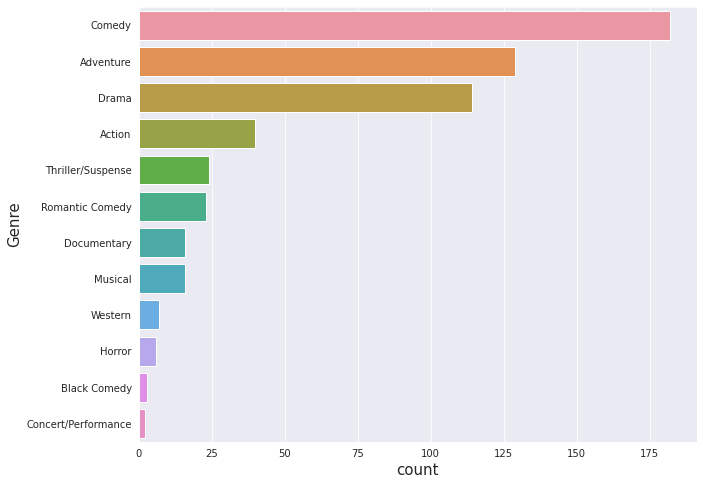

In [19]:
''' value counts of geners '''
genre_label = df.genre.value_counts()

''' barplot '''
plt.figure(figsize=(10, 8))
sns.barplot(genre_label, genre_label.index);
plt.ylabel('Genre', fontsize=15)
plt.xlabel('count', fontsize=15);

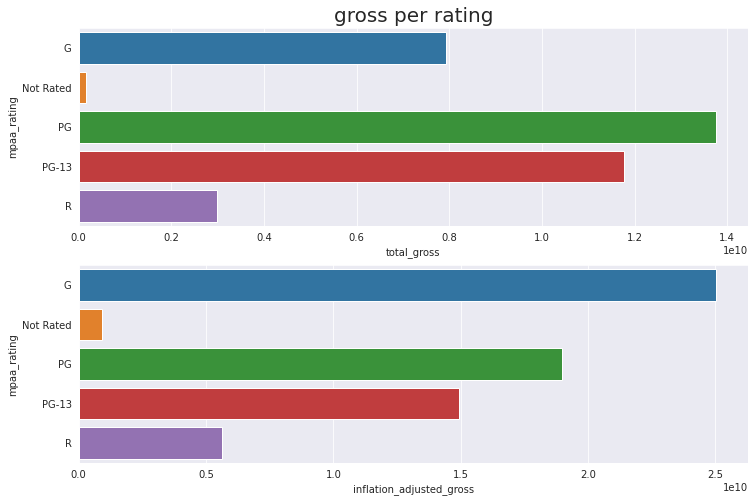

In [20]:
average_r = df.groupby('mpaa_rating').sum()

''' barplot '''
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1).set_title('gross per rating', fontsize=20)
sns.barplot(average_r['total_gross'], average_r.index)

plt.subplot(2, 1, 2)
sns.barplot(average_r['inflation_adjusted_gross'], average_r.index);

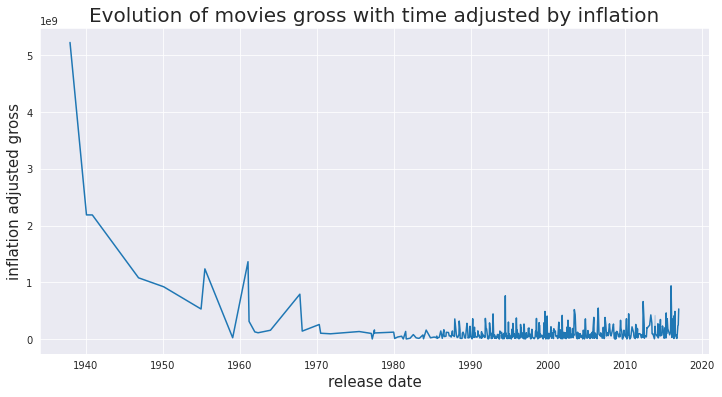

In [21]:
''' line plot b/w release_date and inflation_adjusted_gross '''
plt.figure(figsize=(12, 6))
plt.title('Evolution of movies gross with time adjusted by inflation', fontsize=20)
plt.xlabel('release date', fontsize=15)
plt.ylabel('inflation adjusted gross', fontsize=15)
sns.lineplot(x='release_date', y='inflation_adjusted_gross', data=df);

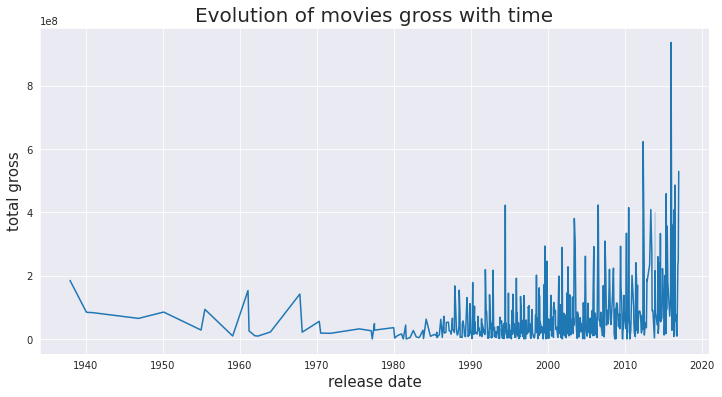

In [22]:
''' line plot b/w release_date and total_gross'''
plt.figure(figsize=(12, 6))
plt.title('Evolution of movies gross with time', fontsize=20)
plt.xlabel('release date', fontsize=15)
plt.ylabel('total gross', fontsize=15)
sns.lineplot(x='release_date', y='total_gross', data=df);

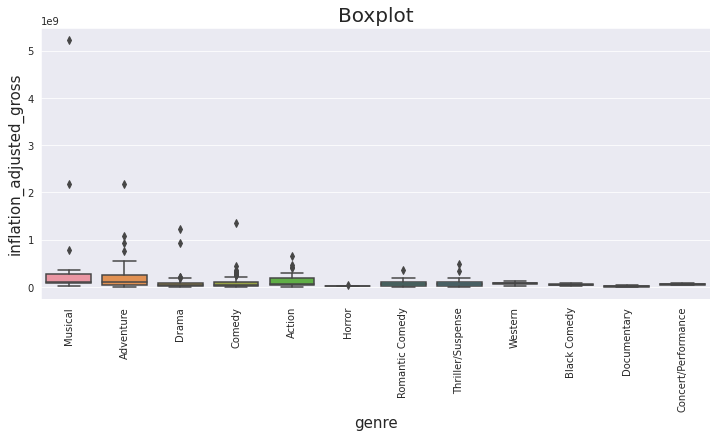

In [23]:
''' boxplot '''
plt.figure(figsize=(12, 5))
plt.xticks(rotation=90)
plt.ylabel('inflation adjusted gross', fontsize=15);
plt.xlabel('genre', fontsize=15);
plt.title('Boxplot', fontsize=20);
sns.boxplot(x='genre', y='inflation_adjusted_gross', data=df);